## Лабораторная работа №1 

#### Дорохин Андрей 221-361

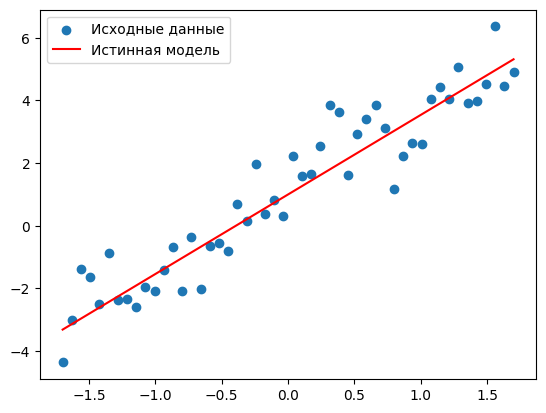

Epoch 100, Loss: 0.8216920495033264, k: 2.2442092895507812, b: 1.2124016284942627
Epoch 200, Loss: 0.748270571231842, k: 2.4594109058380127, b: 1.12471342086792
Epoch 300, Loss: 0.746979296207428, k: 2.4879512786865234, b: 1.1130841970443726
Epoch 400, Loss: 0.7469565868377686, k: 2.4917359352111816, b: 1.1115423440933228
Epoch 500, Loss: 0.7469561100006104, k: 2.4922380447387695, b: 1.1113375425338745
Epoch 600, Loss: 0.7469561100006104, k: 2.4923036098480225, b: 1.111310601234436
Epoch 700, Loss: 0.7469560503959656, k: 2.4923086166381836, b: 1.111309289932251
Epoch 800, Loss: 0.7469560503959656, k: 2.4923086166381836, b: 1.111309289932251
Epoch 900, Loss: 0.7469560503959656, k: 2.4923086166381836, b: 1.111309289932251
Epoch 1000, Loss: 0.7469560503959656, k: 2.4923086166381836, b: 1.111309289932251


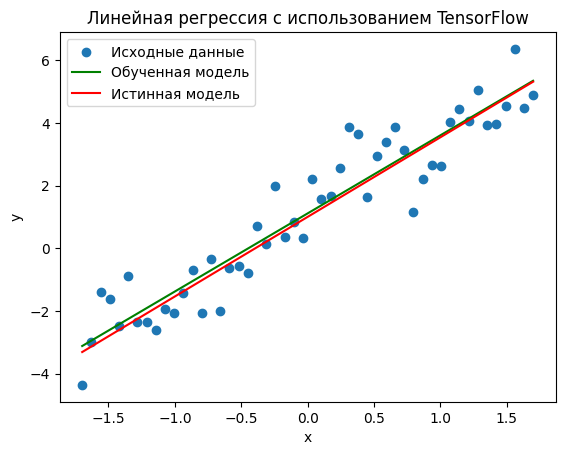

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from keras import optimizers

# Часть 1 (нагенерили синтетических данных)
m = 50  # Количество точек
min_value = -100
max_value = 100
k_0_true = 2.54  # Истинное значение углового коэффициента
b_true = 1.0  # Истинное значение свободного члена
noise_value = 1 # Отклонение шума

learning_rate = 0.01  # Уменьшенная скорость обучения
num_iterations = 1000  # Количество итераций при обучении

# Создание искусственного набора данных
x = np.linspace(min_value, max_value, m)  # Синтетические данные
noise = np.random.normal(0, noise_value, m)  # Уменьшение стандартного отклонения шума

# Нормализация данных
x = (x - np.mean(x)) / np.std(x)

# Визуализация данных
plt.scatter(x, k_0_true * x + b_true + noise, label='Исходные данные')
plt.plot(x, k_0_true * x + b_true, color='red', label='Истинная модель')
plt.legend()
plt.show()

# Часть 2
# Преобразование данных в тензоры TensorFlow
x_tensor = tf.convert_to_tensor(x, dtype=tf.float32)
noise_tensor = tf.convert_to_tensor(noise, dtype=tf.float32)

# Инициализация переменных для обучения
k = tf.Variable(np.random.normal(0, 1), dtype=tf.float32)  # Инициализация близко к нулю
b = tf.Variable(np.random.normal(0, 1), dtype=tf.float32)


def reduce_loss(x, noise):
    # Используем истинные значения с шумом
    y = k_0_true * x + b_true + noise
    y_pred = tf.multiply(k, x) + b
    return tf.reduce_mean((y - y_pred) ** 2)


optimizer = optimizers.SGD(learning_rate)

for step in range(num_iterations):
    with tf.GradientTape() as tape:
        loss = reduce_loss(x_tensor, noise_tensor)  # Используем тензоры
    gradients = tape.gradient(loss, [k, b])
    optimizer.apply_gradients(zip(gradients, [k, b]))

    # Проверка на nan
    if gradients[0] is None or gradients[1] is None:
        print("Градиенты равны None. Проверьте вычисления.")
        break

    if (step + 1) % 100 == 0:
        print(f'Epoch {step + 1}, Loss: {loss.numpy()}, k: {k.numpy()}, b: {b.numpy()}')

# Визуализация результатов
plt.scatter(x, k_0_true * x + b_true + noise, label='Исходные данные')
plt.plot(x, k.numpy() * x + b.numpy(), color='green', label='Обученная модель')
plt.plot(x, k_0_true * x + b_true, color='red', label='Истинная модель')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Линейная регрессия с использованием TensorFlow')
plt.legend()
plt.show()


## Контрольные вопросы

### 1 Что такое градиентный спуск и как он используется в машинном обучении?
Градиентный спуск — это итеративный алгоритм оптимизации, используемый для минимизации функции потерь в задачах машинного обучения. Он работает путем обновления параметров модели (весов нейронной сети) в направлении, противоположном градиенту функции потерь. Это позволяет находить локальный минимум функции потерь.
### 2 Что такое градиент в контексте градиентного спуска?
Градиент — это вектор, который указывает направление наибольшего увеличения функции. В контексте градиентного спуска градиент функции потерь показывает, в каком направлении и насколько сильно следует изменять параметры модели, чтобы уменьшить значение функции потерь.

### 3 Как обновляются веса в градиентном спуске?
Обновление весов в градиентном спуске происходит по следующей формуле:
w = w - a * /\L(w)
w - вектор параметров модели
a - скорость обучения
/\L(w) - градиент функции потерь по параметрам w

### 4 Что такое тензор в TensorFlow?
Тензор — это основная структура данных в TensorFlow. 
Он представляет собой многомерный массив, который может содержать данные различных типов (например, числа, строки) c возможностью расчета вычислений на GPU. 
Тензоры могут иметь разные ранги:
- Скаляр (0-мерный тензор),
- Вектор (1-мерный тензор),
- Матрица (2-мерный тензор).

Тензоры используются для представления входных данных, параметров модели и результатов вычислений.

### 5 По какой причине метод градиентного спуска может остановиться в задаче оптимизации функции потерь?
Метод градиентного спуска может остановиться по нескольким причинам:
1) Алгоритм завершает работу после заданного количества итераций.
2) Изменение функции потерь становится незначительным (например, меньше заданного порога).
3) Градиенты могут стать очень малыми (переобучение) или равными нулю (плоские участки функции).
4) Скорость обучения слишком мала или слишком велика

### 6 При нахождении хорошо аппроксимирующего полинома к какому значению стремится функция потерь?
При нахождении хорошо аппроксимирующего полинома функция потерь стремится к нулю. Это означает, что модель хорошо подгоняет данные, минимизируя ошибку между предсказанными и истинными значениями. В идеале, если модель полностью соответствует данным, функция потерь будет равна нулю. В реальных условиях функция стремится к минимально возможному числу.